In [ ]:
!pip install otter-grader==1.1.6

from google.colab import drive

drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/ITEC419-fa22/hw/hw06

In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook()

# Homework 6: Confidence Intervals

본 자료는 UC Berkeley의 Data 8의 HW08을 수정한 것입니다. (*This document is a modified version of HW08 at Data 8 of UC Berkeley.*)

각 제공된 셀을 채워서 숙제를 완성하기 바랍니다. 항상 테스트할 때는 위의 셀들을 모두 실행하여 미리 제공된 테스트 데이터를 로드한 이후에 진행하기 바랍니다.

여러분은 모든 문제에 대해서는 적절한 위치에 설명과 답변을 제시해야 합니다. **본 숙제에서 제공되는 셀에서 정의한 변수들은 절때 값을 변경하면 안됩니다.** 예를 들어, `max_temperature`에 대한 값을 구해야 할 경우에, 해당 질문에 제대로 답을 구했더라도 추후에 이 변수를 수정하면 검사에서 틀린 것으로 체크될 것입니다.

**숙제 기한:**

이 숙제의 기한은 11월 7일(화) 밤 11시 59분까지입니다. 11월 4일(토) 밤 11시 59분 이전에 제출할 경우에는 5점의 가점이 부여됩니다. **기한이 지난 이후에는 받지 않습니다.**

**Note:** 이 숙제에는 숨어있는 검사가 있습니다. 이는 모든 검사에서 통과되었더라도 최종 점수가 100%라는 것을 의미하지 않는다는 것입니다. 여러분이 제출한 숙제에 대하여 정답인지를 확인하기 위해서 추가적인 데이터로 검사를 진행합니다.

여러분의 답을 다른 학생과 직접적으로 공유하는 것은 허용하지 않습니다. 다만, 조교와 혹은 다른 학생들과 문제에 대하여 논의하는 것은 장려합니다. 서로 협력한 부분에 대해서는 해당 부분에 꼭 명기를 하기 바랍니다.

모든 숙제는 최대한 빠른 시일내에 시작해야 문제가 봉착되었을 때 도움을 받을 수 있는 충분한 시간을 확보할 수 있을 것입니다. 모든 질의는 LMS 시스템의 문의 게시판을 이용하고 개인적인 이메일에는 대응하지 않습니다.

In [ ]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *
import d8error

# These lines do some fancy plotting magic.",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. Thai Restaurants in Berkeley

오스왈도와 바룬은 버클리에서 최고의 태국 음식점이 어디인지를 알아보려고 노력하고 있습니다. 무작위로 선발된 UC버클리 학생 1,500명을 대상으로 설문조사를 실시하고, 각 학생에게 어떤 태국 식당이 가장 좋은지 물어보았습니다. (*참고: 이 데이터는 숙제를 위해서 임의로 만들어진 것입니다.*) 
태국 음식점은 [Lucky House](https://www.google.com/maps/place/Lucky+House+Thai+Cuisine/@37.8707428,-122.270045,15.32z/data=!4m5!3m4!1s0x80857e9e69a8c921:0x7b6d80f58406fb26!8m2!3d37.8721393!4d-122.2672699), [Imm Thai](https://www.google.com/maps/place/Imm+Thai+Street+Food/@37.8704926,-122.2687372,15.51z/data=!4m5!3m4!1s0x80857e9eec4f1e63:0x5f54d96f0dccdb72!8m2!3d37.8719079!4d-122.2691186), [Thai Temple](https://www.google.com/maps/place/Wat+Mongkolratanaram/@37.8689514,-122.2698649,14.75z/data=!4m5!3m4!1s0x80857e886e39daf1:0xe309caa1b5710fc0!8m2!3d37.8563633!4d-122.2707584), 그리고 [Thai Basil](https://www.google.com/maps/place/Thai+Basil/@37.8691911,-122.266539,15.37z/data=!4m5!3m4!1s0x80857c2f6ae0e2f1:0x6978b6e8a72d58d4!8m2!3d37.868327!4d-122.258081)가 있습니다. 결과를 종합한 후, 오스왈도와 바룬은 표본에서 다음과 같은 비율을 도출하였습니다:

|Thai Restaurant  | Percentage|
|:------------:|:------------:|
|Lucky House | 8% |
|Imm Thai | 53% |
|Thai Temple | 25% |
|Thai Basil | 14% |

이 백분율은 UC버클리 학생 모집단의 균일한 랜덤 표본을 나타냅니다. 해당 *parameters*, 즉 각 레스토랑이 모집단 (즉, 모든 UC 버클리 학생)으로부터 받을 투표율을 추정하려고 합니다. 신뢰구간(confidence interval)을 사용하여 추정치(estimate)의 불확실성을 반영하는 값의 범위를 계산할 것입니다.

테이블 `votes`에는 오스왈도와 바룬의 설문조사 결과가 있습니다.

In [ ]:
# Just run this cell
votes = Table.read_table('votes.csv')
votes

Vote
Lucky House
Lucky House
Lucky House
Lucky House
Lucky House
Lucky House
Lucky House
Lucky House
Lucky House
Lucky House


**Question 1.1.** 아래의 함수 `one_resampled_percentage`을 완성하시오.
이 함수는 원 테이블 (`tbl`)에서 부트스트랩 (bootstrap) 샘플을 한번 수행 후 Imm Thai의 득표 ***백분율***을 반환합니다. 백분율은 0과 100사이입니다. **(9 Points)**

*Note:* `tbl`은 항상 `votes`와 같은 형식입니다.

*Hint:* votes 테이블이 주어졌을 때, 여러분은 어떻게 특정 음식점에 대한 투표율이 몇 퍼센트인지 알아낼 수 있습니까? **이 질의에서는 비율이 아닌 백분율을 사용하는 것을 유념하기 바랍니다!**

<!--
BEGIN QUESTION
name: q1_1
manual: false
points:
 - 0
 - 0
 - 2
 - 7
-->

In [ ]:
def one_resampled_percentage(tbl):
    ...

one_resampled_percentage(votes)

52.266666666666659

In [ ]:
grader.check("q1_1")

**Question 1.2.** `percentages_in_resamples` 함수를 완성하시오. 이 함수는 시뮬레이션을 통해 2,022개의 요소(element)를 갖는 배열을 반환합니다. 여기서 각 요소는 Imm Thai에 투표한 유권자 백분율에 대한 부트스트랩 추정치를 나타냅니다. 위 질문에서 여러분이 작성한 `one_resampled_percentage`을 사용해야 합니다. **(9 Points)**

<!--
BEGIN QUESTION
name: q1_2
manual: false
points:
 - 0
 - 4
 - 5
-->

In [ ]:
def percentages_in_resamples():
    percentage_imm = make_array()
    ...

In [ ]:
grader.check("q1_2")

다음 셀에서는 방금 여러분이 정의한 `percentages_in_resamples` 함수를 실행합니다. 그리고 Imm Thai에 투표한 유권자 백분율의 2022개의 부트스트랩 추정치에 대한 계산된 통계치의 히스토그랩을 생성합니다.

*Note:* 실행하는 데 몇 초 정도 걸릴 수 있습니다.

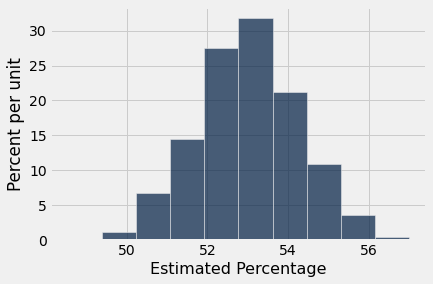

In [ ]:
resampled_percentages = percentages_in_resamples()
Table().with_column('Estimated Percentage', resampled_percentages).hist("Estimated Percentage")

**Question 1.3.** 배열 `resampled_percentages`을 사용하여 부트스트랩 백분율 추정치의 중간 95%의 두 가장자리 값을 찾습니다. 그리고 이 구간의 하단 및 상단 끝을 각각 계산하여 각각 `imm_lower_bound`와 `imm_upper_bound`에 저장합니다. **(9 Points)**

*Hint:* 만약 이 질문에서 막힐 경우에는 교재 [Chapter 13](https://inferentialthinking.com/chapters/13/Estimation.html)을 읽어보세요.

<!--
BEGIN QUESTION
name: q1_3
manual: false
points:
 - 0
 - 9
-->

In [ ]:
imm_lower_bound = ...
imm_upper_bound = ...
print(f"Bootstrapped 95% confidence interval for the percentage of Imm Thai voters in the population: [{imm_lower_bound:.2f}, {imm_upper_bound:.2f}]")

Bootstrapped 95% confidence interval for the percentage of Imm Thai voters in the population: [50.60, 55.47]


In [ ]:
grader.check("q1_3")

**Question 1.4.** 이 설문조사 결과는 Imm Thai가 유권자들 사이에서 다른 태국 식당들을 모두 이기고 있다는 것을 보여주는 것 같습니다. 우리는 신뢰구간을 사용하여 다른 모든 식당을 합친 것보다 Im Thai가 얼마나 우세한 지에 대한 가능한 값의 범위를 결정하고자 합니다. Imm Thai가 Lucky House, Thai Temple, Thai Basil을 합친 것보다 얼마나 앞서고 있는지를 나타내는 Imm Thai의 우세(lead)는 다음과 같이 계산됩니다:

$$\text{Imm Thai's % of the vote} - (\text{100 %} - \text{Imm Thai's % of Vote})$$

함수 `one_resampled_difference`를 정의합니다. 이는 하나의 부트스트랩 샘플로부터 Lucky House, Thai Temple, Thai Basil을 합친 것보다 앞서는 Imm Thai의 백분율의 **정확히 하나의 값**을 반환합니다. **(9 Points)**

*Hint 1:* Imm Thai의 우세 정도(lead)는 음수가 될 수 있습니다.

*Hint 2:* votes 테이블이 주어졌을 때, 여러분은 특정 음식점에 투표한 비율이 몇 퍼센트인지 어떻게 할 수 있을까요? **이 질의에서는 비율(proportions)가 아니라 백분율(percentages)을 사용합니다!**

*Note:* 함수 내에서 제공된 스캘레톤 코드가 도움이 되지 않는다고 생각되면, 여러분 마음대로 자유롭게 변수를 사용해도 됩니다.

<!--
BEGIN QUESTION
name: q1_4
manual: false
points:
 - 0
 - 9
-->

In [ ]:
def one_resampled_difference(tbl):
    bootstrap = ...
    imm_percentage = ...
    ...

In [ ]:
grader.check("q1_4")

<!-- BEGIN QUESTION -->

**Question 1.5.** 함수 `leads_in_resamples`을 작성하시오. 이 함수는 2022개의 요소를 갖는 배열을 반환합니다. Imm Thai가 Lucky House, Thai Temple, Thai Basil를 모두 합친 것보다 얼마나 우세한지를 나타내는 부트스트랩 추정치 (함수 `one_resampled_difference`의 실행 결과)를 2022개 포함한 배열을 반환합니다. 그 이후에 셀 내에서 결과 샘플의 히스토그램을 표시합니다. **(9 Points)**

*Hint:* 만약 `NoneType`과 관련된 오류가 난다면, 함수에 어떤 구성 요소가 필요한지 고려하기 바랍니다!

<!--
BEGIN QUESTION
name: q1_5
manual: true
-->

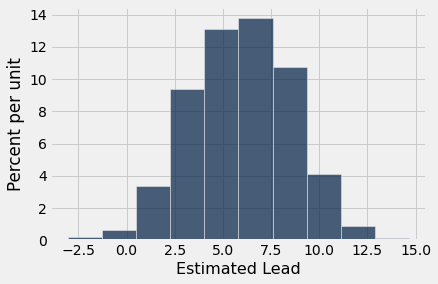

In [ ]:
def leads_in_resamples():
    ...

sampled_leads = leads_in_resamples()
Table().with_column('Estimated Lead', sampled_leads).hist("Estimated Lead")

<!-- END QUESTION -->

**Question 1.6.** Question 1.5의 `sampled_leads`에 있는 시뮬레이션 데이터를 사용하여 Imm Thai가 Lucky House, Thai Temple, Thai Basil를 합친것 보다 실제로 우세 정도의 95% 신뢰구간을 계산합니다. **(9 Points)**

<!--
BEGIN QUESTION
name: q1_6
manual: false
points:
 - 0
 - 2
 - 7
-->

In [ ]:
diff_lower_bound = ...
diff_upper_bound = ...
print("Bootstrapped 95% confidence interval for Imm Thai's true lead over Lucky House, Thai Temple, and Thai Basil combined: [{:f}%, {:f}%]".format(diff_lower_bound, diff_upper_bound))

Bootstrapped 95% confidence interval for Imm Thai's true lead over Lucky House, Thai Temple, and Thai Basil combined: [1.066667%, 10.800000%]


In [ ]:
grader.check("q1_6")

## 2. Interpreting Confidence Intervals 

조교는 Imm Thai 유권자의 백분율에 대한 95% 신뢰구간을 다음과 같이 계산하였습니다:

$$[50.53, 55.53]$$

(여러분의 답은 무작위성 때문에 약간 달랐을 수도 있습니다; 이는 여러분의 답이 틀렸다는 것을 의미하지 않습니다!)

<!-- BEGIN QUESTION -->

**Question 2.1.** 조교는 또한 동일한 표본에서 70%, 90%, 99%의 신뢰구간을 생성하였지만, 어떤 신뢰구간이 어떤 백분율을 나타내는지를 표시하는 것을 잊었습니다! 
**제일 먼저** 각 신뢰구간 (70%, 90%, 99%)을 아래 셀의 해당 간격과 일치시킵니다. (예를 들어  __ % CI: [52.1, 54] $\rightarrow$ 공백을 세 가지 신뢰구간 중 하나로 바꿉니다.) **그런 이후** 여러분이 왜 그러한 답을 생각해냈는지 사고과정을 설명합니다. **(10 Points)**

그 구간은 다음과 같습니다:

* [50.03, 55.94]
* [52.1, 54]
* [50.97, 54.99]


<!--
BEGIN QUESTION
name: q2_1
manual: true
-->

_이 텍스트를 삭제하고 여러분의 답을 이곳에 작성합니다._

* 70% CI: [52.1, 54]
* 90% CI: [50.97, 54.99]
* 99% CI: [50.03, 55.94]

구간이 넓을 수록 CI의 값이 큽니다.

<!-- END QUESTION -->

**Question 2.2.** 모집단에서 6,000개의 새 표본을 생성하고 (각 표본은 1,500명의 학생으로 구성된 새롭고 독특한 균일 랜덤 표본임) 각 표본에서 95% 신뢰구간을 생성하였다고 가정합니다. 그 6,000개의 구간 중 얼마나 많은 구간이 실제로 모집단의 실제 백분율을 포함할 것으로 예상합니까? **(9 Points)**

여러분의 답을 `true_percentage_intervals`에 저장하시오.

<!--
BEGIN QUESTION
name: q2_2
manual: false
points:
 - 0
 - 9
-->

In [ ]:
true_percentage_intervals = ...

In [ ]:
grader.check("q2_2")

여러분이 생성한 두번째 부트스트랩 신뢰구간을 떠올려보세요. 이 구간은 Imm Thai가 Lucky House, Thai Temple, Thai Basil을 합친 것보다 얼마나 앞서는지를 추정했습니다. 표본의 유권자 중에서 Imm Thai의 우세정도는 6%였습니다. 조교가 구한 모든 유권자의 모집단에서 우세정도의 95% 신뢰구간은 다음과 같았습니다:

$$[1.2, 11.2]$$

간단한 예-아니오 질문을 테스트하는데 관심이 있다고 가정합니다.

> "Imm Thai의 득표율은 Lucky House, Thai Temple, Thai Basil을 모두 합친 득표율과 같습니까?"

우리의 귀무가설 (null hypothesis)은 Imm Thai의 우세정도가 정확히 0이라는 백분율이 같거나 동등하다는 것입니다. 대안가설 (alternative hypothesis)은 Imm Thai의 우세가 0과 같지 않다는 것입니다. 아래의 질문에서 신뢰구간을 스스로 계산하지 말고 조교의 95% 신뢰구간만 사용하십시오.

**Question 2.3.** 가령 5%의 p-값 컷오프를 사용한다고 가정합니다. null을 거부합니까? null을 거부하지 않습니까? 혹은 조교의 신뢰구간을 사용할 경우 답할 수 없습니까? **(9 Points)**

`cutoff_five_percent`에 정답에 해당하는 숫자를 지정하시오.

1. 귀무 기각(Reject the null) / 데이터가 대립가설과 일치합니다.
2. 귀무 기각 실패(Fail to reject the null) / 데이터는 귀무가설과 일치합니다.
3. 조교의 신뢰구간을 사용할 경우 알 수 없습니다.

*Hint:* p-값 컷오프와 신뢰 간의 관계를 고려합니다. 헷갈릴 경우, 교재의 [이 부분](https://inferentialthinking.com/chapters/13/4/Using_Confidence_Intervals.html)을 참조하십시오.

<!--
BEGIN QUESTION
name: q2_3
manual: false
points:
 - 0
 - 0
 - 0
 - 9
-->

In [ ]:
cutoff_five_percent = ...

In [ ]:
grader.check("q2_3")

**Question 2.4.** 대신 1%의 p-값 컷오프를 사용한다면 우리는 null을 거부합니까, null을 거부하지 못합니까, 아니면 조교의 신뢰구간을 사용하여 알 수 없습니까? **(9 Points)**

정답에 해당하는 숫자를 `cutoff_one_percent`에 지정합니다.

1. 귀무 기각(Reject the null) / 데이터가 대립가설과 일치합니다.
2. 귀무 기각 실패(Fail to reject the null) / 데이터는 귀무가설과 일치합니다.
3. 조교의 신뢰구간을 사용할 경우 알 수 없습니다.

<!--
BEGIN QUESTION
name: q2_4
manual: false
points:
 - 0
 - 9
-->

In [ ]:
cutoff_one_percent = ...

In [ ]:
grader.check("q2_4")

All tests passed!

**Question 2.5.** 만약 10%의 p-값 컷오프를 사용한다면 우리는 null을 거부합니까, null을 거부하지 못합니까, 아니면 조교의 신뢰구간을 사용하여 알 수 없습니까? **(9 Points)**

정답에 해당하는 숫자를 `cutoff_ten_percent`에 지정합니다.

1. 귀무 기각(Reject the null) / 데이터가 대립가설과 일치합니다.
2. 귀무 기각 실패(Fail to reject the null) / 데이터는 귀무가설과 일치합니다.
3. 조교의 신뢰구간을 사용할 경우 알 수 없습니다.

<!--
BEGIN QUESTION
name: q2_5
manual: false
points:
 - 0
 - 9
-->

In [ ]:
cutoff_ten_percent = ...

In [ ]:
grader.check("q2_5")

숙제 06이 완성되었습니다! 

**중요한 숙제 제출 단계:**
1. 테스트를 실행하고 모두 통과했는지 확인합니다.
2. **File** 메뉴에서 **Save and pin revision**을 선택한 다음 **마지막 셀을 실행**합니다.
3. 링크를 클릭하여 zip 파일을 다운로드합니다.
4. LMS를 통해 숙제를 제출합니다. 만약 여러번 제출할 경우에는 마지막으로 제출된 것만을 고려할 것입니다.

---

다시한번 체크하기 위해서 아래의 셀을 통해 자동채점 테스트를 모두 한번 더 실행합니다.

In [ ]:
grader.check_all()

## Submission

아래 셀을 실행하기 전에 노트북의 모든 셀을 순서대로 실행했는지 확인하여 모든 이미지/그래프가 출력에 나타나도록 하십시오. 아래 셀은 제출할 zip 파일을 생성합니다. **내보내기 전에 저장하십시오!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)

구글 코랩에서 grader 현재 버전은 위의 zip 파일 링크가 작동되지 않고, 현재 디렉토리(구글 드라이브의 .../hw/hw06/) 내에 hw05.zip으로 저장되어 있습니다. 따라서 해당 zip 파일을 LMS에 제출하면 됩니다.   